# SIR model for Coronavirus 2019- Case China

In [1]:
import numpy as np
import pandas as pd
import Covid19SIRModel
import matplotlib.pyplot as plt

# SIR model
* S(t) is the number of susceptible individuals. 
\begin{equation*}
\frac{dS(t)}{dt} = -\beta \frac{S(t)I(t)}{N}
\end{equation*}
* I(t) is the number of infected individuals. 
\begin{equation*}
\frac{dI(t)}{dt} = \beta \frac{S(t)I(t)}{N}-\gamma I(t) - \delta I(t)
\end{equation*}
* R(t) is the number of recovered individuals
\begin{equation*}
\frac{dR(t)}{dt} = \gamma I(t)
\end{equation*}
* D(t) is the number of death individuals
\begin{equation*}
\frac{dD(t)}{dt} = \delta I(t)
\end{equation*}

# Read Real data

In [2]:
N = 1437570976 # population
N = N*0.56/10000
COVID19 = Covid19SIRModel.Covid19SIRModel("China",N)
df_trend = COVID19.readData()

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [3]:
df_trend.tail()

,Date,Confirmed,Deaths,Recovered,Infected,Death_rate
59,2020-03-21,81305.0,3259.0,71857.0,6189.0,4.008364
60,2020-03-22,81435.0,3274.0,72362.0,5799.0,4.020384
61,2020-03-23,81498.0,3274.0,72814.0,5410.0,4.017276
62,2020-03-24,81591.0,3281.0,73280.0,5030.0,4.021277
63,2020-03-25,81661.0,3285.0,73773.0,4603.0,4.022728


/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


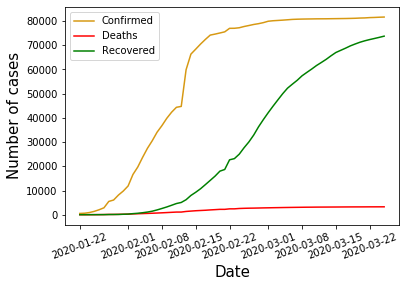

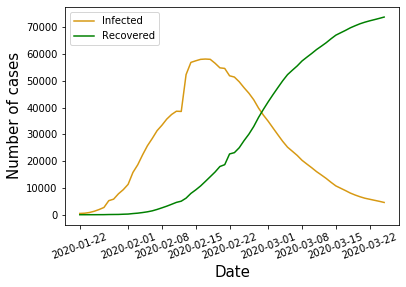

In [4]:
COVID19.plotRealData()

# Data Analysis on Real Data
## Recovered Rate

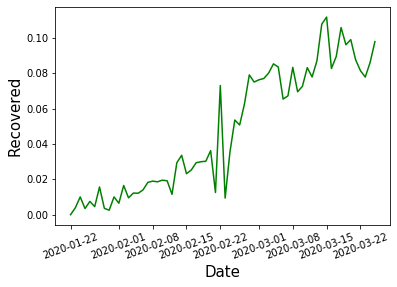

In [5]:
gamma_list = COVID19.calculateRates("gamma", "Recovered")

# Infectious rate

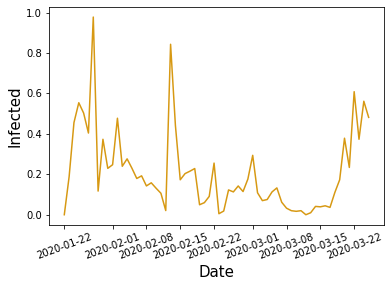

In [6]:
beta_list = COVID19.calculateRates("beta", "Infected")

## Death rate (rate changing from infectious to deaths daily)

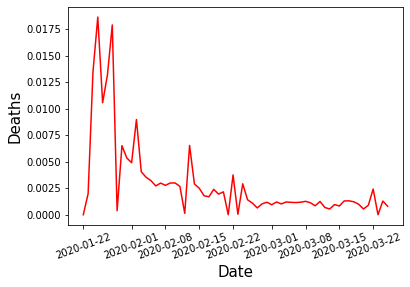

In [7]:
delta_list = COVID19.calculateRates("delta", "Deaths")

## Death rate

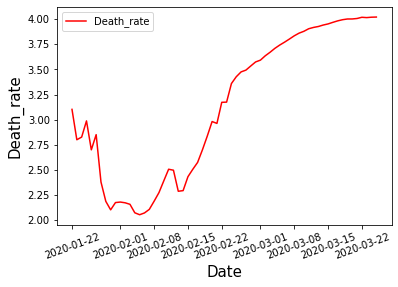

In [9]:
plt.plot(COVID19.timeSpan(), 'Death_rate', data=df_trend, color='red')
plt.ylabel('Death_rate', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.xticks(rotation=20)
plt.legend()
plt.show()

# Parameter and initial condition
* $\beta$ is the infectious rate
* $\gamma$ is the recovery rate
* $\delta$ is the death rate

In [10]:
COVID19.setUpInitialCondition()
beta, gamma, delta = COVID19.calculateHyperParameter()

Gamma:  0.04514136621578128
Delta:  0.002010076694981111



Beta:  0.335


# Modelling

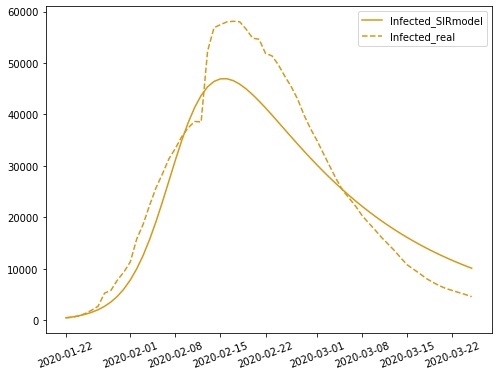

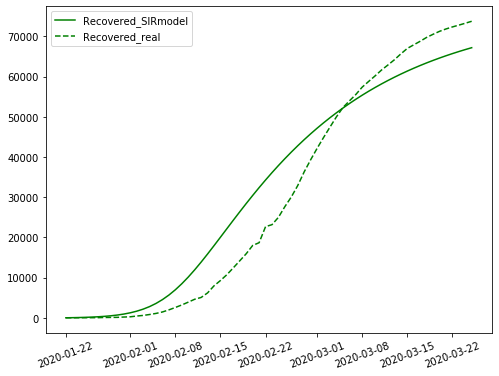

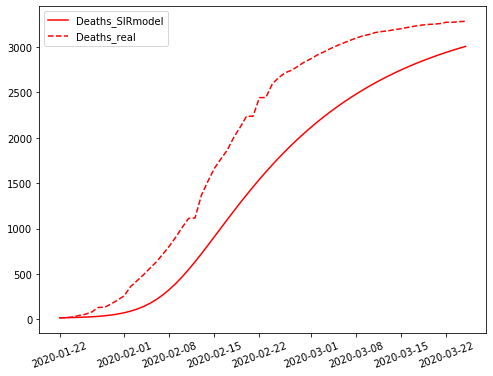

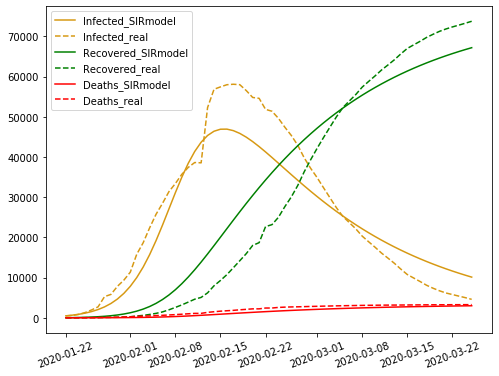

In [11]:
days_shift = 0
S, I, R, D = COVID19.modelling(days_shift)

# Prediction

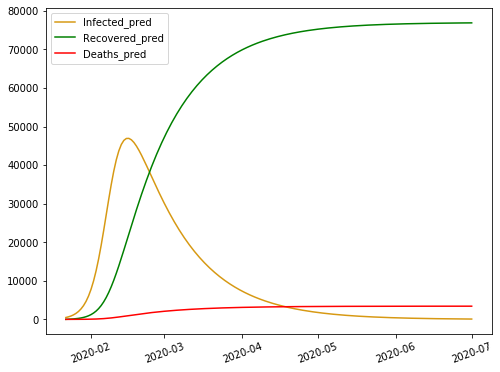

In [12]:
t, S_p, I_p, R_p, D_p = COVID19.prediction('2020-1-22','2020-7-1', days_shift)

In [13]:
data = np.array([list(S_p),list(I_p),list(R_p),list(D_p)])
df = pd.DataFrame({"Date":t,"Infectious":list(I_p),
                   "Recovered":list(R_p),"Deaths":list(D_p)})
df = df.round(0)
df.tail()

,Date,Infectious,Recovered,Deaths
157,2020-06-27,124.0,76874.0,3439.0
158,2020-06-28,119.0,76879.0,3439.0
159,2020-06-29,113.0,76884.0,3439.0
160,2020-06-30,108.0,76889.0,3440.0
161,2020-07-01,103.0,76894.0,3440.0
